In [122]:
import pandas as pd
import numpy_financial as npf

In [2]:
def calculate_take_home_pay(gross_income, num_children):
    brackets = [(11000, 0.10), (44725, 0.12), (95375, 0.22), 
                (182100, 0.24), (231250, 0.32), (578125, 0.35), 
                (float('inf'), 0.37)]
    child_tax_credit = 2000  # This is the value for 2023.
    taxes = 0
    for i in range(len(brackets)):
        if gross_income > brackets[i][0]:
            if i != 0:
                taxes += (brackets[i][0] - brackets[i-1][0]) * brackets[i-1][1]
            else:
                taxes += brackets[i][0] * brackets[i-1][1]
        else:
            taxes += (gross_income - (0 if i == 0 else brackets[i-1][0])) * brackets[i-1][1]
            break
    taxes -= num_children * child_tax_credit  # Apply the child tax credit.
    taxes = max(0, taxes)  # Ensure taxes are not negative.
    return gross_income - taxes

def amortization_schedule(loan_amount, interest_rate, loan_term):
    monthly_interest_rate = interest_rate / 12 / 100
    number_of_payments = loan_term * 12

    # Calculate the fixed monthly payment using the loan payment formula
    monthly_payment = loan_amount * (monthly_interest_rate * (1 + monthly_interest_rate) ** number_of_payments) / ((1 + monthly_interest_rate) ** number_of_payments - 1)

    schedule = []

    for payment_number in range(1, number_of_payments + 1):
        interest_payment = loan_amount * monthly_interest_rate
        principal_payment = monthly_payment - interest_payment
        loan_amount -= principal_payment

        schedule.append({
            'payment_number': payment_number,
            'monthly_payment': round(monthly_payment, 2),
            'principal_payment': round(principal_payment, 2),
            'interest_payment': round(interest_payment, 2),
            'remaining_balance': round(loan_amount, 2)
        })

    return schedule




In [3]:
# potential future earnings

earnings_df = pd.DataFrame({'year':range(1,31)})
earnings_df = earnings_df.set_index('year')
earnings_df['salary'] = 85_000 * ((1 + 0.03) ** (earnings_df.index - 1))
earnings_df['salary'] = earnings_df['salary'].round(0)
earnings_df.loc[earnings_df.index.isin([1,2,3]), 'children'] = 2
earnings_df.loc[earnings_df.index.isin([4,5]), 'children'] = 3
earnings_df.loc[earnings_df.index >= 6, 'children'] = 4
earnings_df['children_expense'] = earnings_df['children'] * 12 * 150
earnings_df['take_home_pay'] = earnings_df.apply(lambda row: calculate_take_home_pay(row['salary'], row['children']), axis=1)
earnings_df['tithing'] = earnings_df['salary'] * .1
earnings_df['charity'] = earnings_df['take_home_pay'] * (0.01 * (earnings_df['children'] + 2))
earnings_df['remaining_monthly'] = (earnings_df['take_home_pay'] - earnings_df[['tithing', 'charity', 'children_expense']].sum(axis=1)) / 12
earnings_df['remaining_monthly'] = earnings_df['remaining_monthly'].round(2)
earnings_df['charity'] = earnings_df['charity'].round(2)
earnings_df

,salary,children,children_expense,take_home_pay,tithing,charity,remaining_monthly
year,,,,,,,
1,85000.0,2.0,3600.0,76724.50,8500.0,3068.98,5129.63
2,87550.0,2.0,3600.0,78968.50,8755.0,3158.74,5287.90
3,90176.0,2.0,3600.0,81279.38,9017.6,3251.18,5450.88
4,92882.0,3.0,5400.0,85660.66,9288.2,4283.03,5557.45
5,95668.0,3.0,5400.0,88083.04,9566.8,4404.15,5726.01
6,98538.0,4.0,7200.0,92321.64,9853.8,5539.30,5810.71
7,101494.0,4.0,7200.0,94627.32,10149.4,5677.64,5966.69
8,104539.0,4.0,7200.0,97002.42,10453.9,5820.15,6127.36
9,107675.0,4.0,7200.0,99448.50,10767.5,5966.91,6292.84


In [4]:
def calculate_mortgage(P, r, n):
    r = r / (12 * 100)  # Convert annual interest rate to monthly and in decimal form.
    numerator = r * (1 + r)**n
    denominator = (1 + r)**n - 1
    M = P * (numerator/denominator)
    return M

In [89]:
# scenario 1: we pay rent for a 1000, which allows us to save 1500/month in long term
house_value = 375_000
property_tax = house_value * 0.0199 / 12

scenario1_df = pd.DataFrame({'year':range(1,31)})
scenario1_df = scenario1_df.set_index('year')
scenario1_df['rent_paid'] = (1000 + property_tax) * 12
scenario1_df['rent_paid_cum'] = scenario1_df['rent_paid'].cumsum()
scenario1_df['money_saved'] = (2500 * 12) - scenario1_df['rent_paid']
scenario1_df['money_saved_cum'] = scenario1_df['money_saved'].cumsum()
scenario1_df['potential_loan_amount'] = house_value - scenario1_df['money_saved_cum']
scenario1_df['potential_mortgage'] = scenario1_df.apply(lambda row: calculate_mortgage(row['potential_loan_amount'], 4, 30*12), axis=1).round(2)
scenario1_df['property_tax'] = property_tax
scenario1_df['home_insurance'] = 100
scenario1_df['potential_full_payment'] = scenario1_df[['potential_mortgage', 'property_tax', 'home_insurance']].sum(axis=1).round(2)
scenario1_df['remaining_monthly_after_mortgage'] = earnings_df['remaining_monthly'] - scenario1_df['potential_full_payment']

cut_off_year = 4
amount_saved = scenario1_df.loc[scenario1_df.index == cut_off_year, 'money_saved_cum'].values[0]

s1_interest_rate = 4
s1_loan_term = 30
s1_loan_amount = house_value - amount_saved

s1_amort_schedule = pd.DataFrame(amortization_schedule(s1_loan_amount, s1_interest_rate, s1_loan_term))
s1_amortization_df_annual = s1_amort_schedule.groupby(s1_amort_schedule['payment_number'] // 12).sum()
s1_amortization_df_annual['year'] = s1_amortization_df_annual.index + 1
s1_amortization_df_annual = s1_amortization_df_annual.set_index('year')
s1_amortization_df_annual['yearly_payment'] = s1_amortization_df_annual['monthly_payment']
s1_amortization_df_annual['monthly_payment'] = s1_amortization_df_annual['monthly_payment'] / 12
s1_amortization_df_annual['monthly_payment'] = s1_amortization_df_annual['monthly_payment'].round(2)
del s1_amortization_df_annual['payment_number']

scenario1_df_mort = pd.DataFrame(columns=list(scenario1_df.columns))
scenario1_df_mort['year'] = range(1,31)
scenario1_df_mort = scenario1_df_mort.set_index('year')
scenario1_df_mort['rent_paid'] = s1_amortization_df_annual['yearly_payment']
scenario1_df_mort['rent_paid_cum'] = s1_amortization_df_annual['yearly_payment'].cumsum()
scenario1_df_mort['money_saved'] = s1_amortization_df_annual['principal_payment']
scenario1_df_mort['money_saved_cum'] = s1_amortization_df_annual['principal_payment'].cumsum() + amount_saved
scenario1_df_mort['potential_loan_amount'] = house_value - scenario1_df_mort['money_saved_cum']
scenario1_df_mort['potential_mortgage'] = s1_amortization_df_annual['yearly_payment'] / 12
scenario1_df_mort['property_tax'] = property_tax
scenario1_df_mort['home_insurance'] = 100
scenario1_df_mort['potential_full_payment'] = scenario1_df_mort[['potential_mortgage', 'property_tax', 'home_insurance']].sum(axis=1).round(2)
scenario1_df_mort['remaining_monthly_after_mortgage'] = earnings_df['remaining_monthly'] - scenario1_df['potential_full_payment']

scenario1_df_mort.index = scenario1_df_mort.index + cut_off_year

scenario1_df_concat = pd.concat([scenario1_df.loc[scenario1_df.index <= cut_off_year], scenario1_df_mort], axis=0)
scenario1_df_concat['remaining_after_mortgage_cum'] = (scenario1_df_concat['remaining_monthly_after_mortgage'] * 12).cumsum()

In [79]:
scenario1_df_concat

,rent_paid,rent_paid_cum,money_saved,money_saved_cum,potential_loan_amount,potential_mortgage,property_tax,home_insurance,potential_full_payment,remaining_monthly_after_mortgage
year,,,,,,,,,,
1,19462.50,19462.50,10537.50,10537.50,364462.50,1740.000000,621.875,100,2461.88,2667.75
2,19462.50,38925.00,10537.50,21075.00,353925.00,1689.690000,621.875,100,2411.56,2876.34
3,19462.50,58387.50,10537.50,31612.50,343387.50,1639.380000,621.875,100,2361.26,3089.62
4,19462.50,77850.00,10537.50,42150.00,332850.00,1589.080000,621.875,100,2310.96,3246.49
5,17479.88,17479.88,5364.16,47514.16,327485.84,1456.656667,621.875,100,2178.53,2667.75
6,19068.96,36548.84,6080.15,53594.31,321405.69,1589.080000,621.875,100,2310.96,2876.34
7,19068.96,55617.80,6327.86,59922.17,315077.83,1589.080000,621.875,100,2310.96,3089.62
8,19068.96,74686.76,6585.68,66507.85,308492.15,1589.080000,621.875,100,2310.96,3246.49
9,19068.96,93755.72,6853.99,73361.84,301638.16,1589.080000,621.875,100,2310.96,3465.37


In [42]:
scenario1_df.loc[scenario1_df.index == cut_off_year, 'money_saved_cum'].values[0]

72000

In [69]:
amortization_df_annual

,monthly_payment,principal_payment,interest_payment,remaining_balance,yearly_payment
year,,,,,
1,1750.52,6446.34,14559.92,4361536.55,21006.26
2,1909.66,7306.77,15609.17,4675439.73,22915.92
3,1909.66,7604.47,15311.46,4585835.19,22915.92
4,1909.66,7914.29,15001.63,4492580.03,22915.92
5,1909.66,8236.72,14679.20,4395525.53,22915.92
6,1909.66,8572.30,14343.64,4294516.88,22915.92
7,1909.66,8921.54,13994.40,4189392.96,22915.92
8,1909.66,9285.03,13630.92,4079986.13,22915.92
9,1909.66,9663.30,13252.62,3966121.91,22915.92


In [88]:
# scenario 2: we pay them a mortgage based on 3% interest

home_value = 375_000
property_tax = house_value * 0.0199 / 12

s2_amortization_df = pd.DataFrame(amortization_schedule(home_value, 3, 30))  
s2_amortization_df_annual = s2_amortization_df.groupby(s2_amortization_df['payment_number'] // 12).sum() 
s2_amortization_df_annual['year'] = s2_amortization_df_annual.index + 1
s2_amortization_df_annual = s2_amortization_df_annual.set_index('year')
s2_amortization_df_annual['yearly_payment'] = s2_amortization_df_annual['monthly_payment']
s2_amortization_df_annual['monthly_payment'] = s2_amortization_df_annual['monthly_payment'] / 12
s2_amortization_df_annual['monthly_payment'] = s2_amortization_df_annual['monthly_payment'].round(2)
del s2_amortization_df_annual['payment_number']

scenario2_df = s2_amortization_df_annual.copy()
scenario2_df['cumulative_equity'] = scenario2_df['principal_payment'].cumsum()
scenario2_df['interest_payment_total'] = scenario2_df['interest_payment'].cumsum()
scenario2_df['property_tax'] = property_tax
scenario2_df['home_insurance'] = 100
scenario2_df['total_monthly_payment'] = scenario2_df['monthly_payment'] + scenario2_df['property_tax'] + scenario2_df['home_insurance']
scenario2_df['remaining_monthly_after_mortgage'] = earnings_df['remaining_monthly'] - scenario2_df['monthly_payment'] - scenario2_df['property_tax'] - scenario2_df['home_insurance']
scenario2_df['remaining_after_mortgage_cum'] = (scenario2_df['remaining_monthly_after_mortgage'] * 12).cumsum()

In [68]:
scenario2_df.head(20)

,monthly_payment,principal_payment,interest_payment,remaining_balance,yearly_payment,cumulative_equity,interest_payment_total,property_tax,home_insurance,total_monthly_payment,remaining_monthly_after_mortgage
year,,,,,,,,,,,
1,1270.56,8441.92,6804.89,4074489.07,15246.77,8441.92,6804.89,621.875,100,1992.435,3137.195
2,1386.07,9387.45,7245.42,4337864.82,16632.84,17829.37,14050.31,621.875,100,2107.945,3179.955
3,1386.07,9576.94,7055.94,4223987.48,16632.84,27406.31,21106.25,621.875,100,2107.945,3342.935
4,1386.07,9770.23,6862.63,4107811.59,16632.84,37176.54,27968.88,621.875,100,2107.945,3449.505
5,1386.07,9967.44,6665.43,3989290.81,16632.84,47143.98,34634.31,621.875,100,2107.945,3618.065
6,1386.07,10168.66,6464.27,3868377.74,16632.84,57312.64,41098.58,621.875,100,2107.945,3702.765
7,1386.07,10373.88,6258.99,3745024.11,16632.84,67686.52,47357.57,621.875,100,2107.945,3858.745
8,1386.07,10583.26,6049.58,3619180.66,16632.84,78269.78,53407.15,621.875,100,2107.945,4019.415
9,1386.07,10796.89,5836.00,3490797.17,16632.84,89066.67,59243.15,621.875,100,2107.945,4184.895


In [90]:
s1_s2 = pd.concat([scenario1_df_concat[['money_saved_cum', 'remaining_monthly_after_mortgage', 'remaining_after_mortgage_cum']], scenario2_df[['cumulative_equity', 'remaining_monthly_after_mortgage', 'remaining_after_mortgage_cum']]], axis=1)

# rename columns
s1_s2.columns = ['s1_money_saved_cum', 's1_remaining_monthly_after_mortgage', 's1_remaining_after_mortgage_cum', 's2_cumulative_equity', 's2_remaining_monthly_after_mortgage', 's2_remaining_after_mortgage_cum']

In [92]:
s1_s2_compare = pd.DataFrame()
s1_s2_compare['money_saved_cum'] = s1_s2['s1_money_saved_cum'] - s1_s2['s2_cumulative_equity']
s1_s2_compare['remaining_monthly_after_mortgage'] = s1_s2['s1_remaining_monthly_after_mortgage'] - s1_s2['s2_remaining_monthly_after_mortgage']
s1_s2_compare['remaining_after_mortgage_cum'] = s1_s2['s1_remaining_after_mortgage_cum'] - s1_s2['s2_remaining_after_mortgage_cum']

In [93]:
s1_s2_compare

,money_saved_cum,remaining_monthly_after_mortgage,remaining_after_mortgage_cum
year,,,
1,3369.68,-290.735,-3488.82
2,5859.91,-108.665,-4792.80
3,8105.40,-58.365,-5493.18
4,10098.66,-8.065,-5589.96
5,6658.71,-755.365,-14654.34
6,3666.94,-631.475,-22232.04
7,646.95,-574.175,-29122.14
8,-2399.54,-577.975,-36057.84
9,-5470.68,-524.575,-42352.74


In [97]:
import matplotlib.pyplot as plt

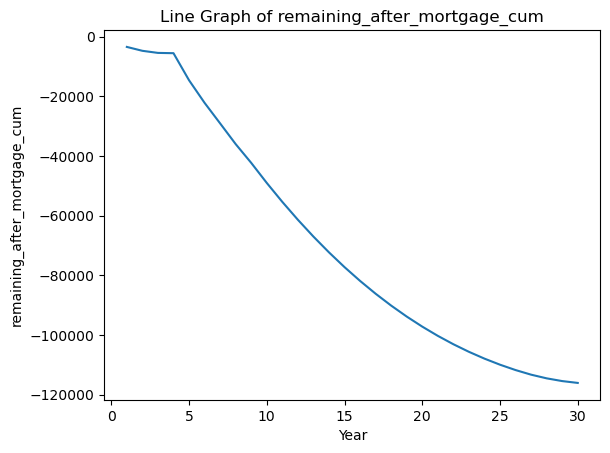

In [100]:
s1_s2_compare['remaining_after_mortgage_cum'].plot(kind='line')
plt.ylabel('remaining_after_mortgage_cum')
plt.xlabel('Year')
plt.title('Line Graph of remaining_after_mortgage_cum')
plt.show()


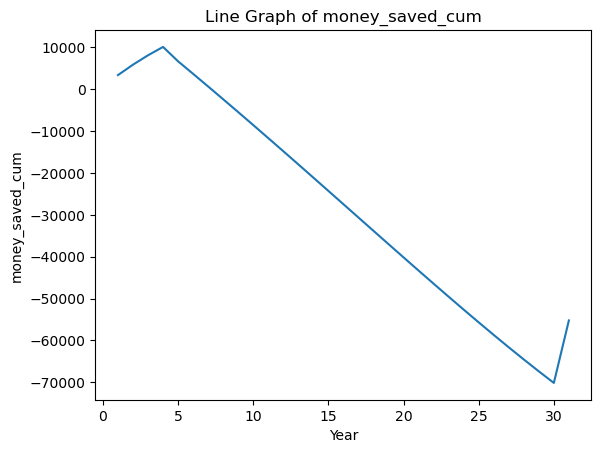

In [101]:
# Plot for 'money_saved_cum'
s1_s2_compare['money_saved_cum'].plot(kind='line')
plt.ylabel('money_saved_cum')
plt.xlabel('Year')
plt.title('Line Graph of money_saved_cum')
plt.show()

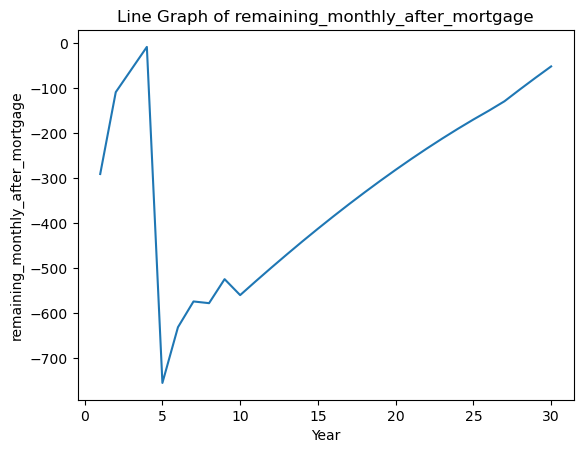

In [102]:
# Plot for 'remaining_monthly_after_mortgage'
s1_s2_compare['remaining_monthly_after_mortgage'].plot(kind='line')
plt.ylabel('remaining_monthly_after_mortgage')
plt.xlabel('Year')
plt.title('Line Graph of remaining_monthly_after_mortgage')
plt.show()

In [126]:
# scenarior 3: we continue to rent and buy later
columns = [
        'year', 
        'monthly_payment', 
        'yearly_payment', 
        'total_paid', 
        'monthly_money_saved', 
        'yearly_money_saved', 
        'total_saved', 
        'monthly_equity', 
        'yearly_equity', 
        'total_equity',
        'property_tax',
        'home_insurance',
        'total_monthly_payment',
        'total_yearly_payment',
        'total_total_payment',
        'remaining_monthly_after_mortgage',
        'remaining_after_mortgage_cum']

scenario3_df = pd.DataFrame(columns=columns)

cut_off_year = 10
home_value_at_cut_off = 400_000
interest_rate = 3
loan_duration = 30
rent = 2000
property_tax = 0.0199
home_insurance = 100
monthly_available = 2500

scenario3_df['year'] = range(1, cut_off_year + loan_duration + 1)

# create renting scenario
scenario3_df.loc[scenario3_df['year'] <= cut_off_year, 'monthly_payment'] = rent
scenario3_df.loc[scenario3_df['year'] <= cut_off_year, 'yearly_payment'] = rent * 12
scenario3_df.loc[scenario3_df['year'] <= cut_off_year, 'total_paid'] = rent * 12 * scenario3_df['year']
scenario3_df.loc[scenario3_df['year'] <= cut_off_year, 'monthly_money_saved'] = 2500 - scenario3_df.loc[scenario3_df['year'] <= cut_off_year, 'monthly_payment']
scenario3_df.loc[scenario3_df['year'] <= cut_off_year, 'yearly_money_saved'] = (2500 - scenario3_df.loc[scenario3_df['year'] <= cut_off_year, 'monthly_payment']) * 12
scenario3_df.loc[scenario3_df['year'] <= cut_off_year, 'total_saved'] = (2500 - scenario3_df.loc[scenario3_df['year'] <= cut_off_year, 'monthly_payment']) * 12 * scenario3_df['year']
scenario3_df.loc[scenario3_df['year'] <= cut_off_year, 'monthly_equity'] = 0
scenario3_df.loc[scenario3_df['year'] <= cut_off_year, 'yearly_equity'] = 0
scenario3_df.loc[scenario3_df['year'] <= cut_off_year, 'total_equity'] = 0
scenario3_df.loc[scenario3_df['year'] <= cut_off_year, 'property_tax'] = 0
scenario3_df.loc[scenario3_df['year'] <= cut_off_year, 'home_insurance'] = 11
scenario3_df.loc[scenario3_df['year'] <= cut_off_year, 'total_monthly_payment'] = scenario3_df.loc[scenario3_df['year'] <= cut_off_year, ['monthly_payment', 'property_tax', 'home_insurance']].sum(axis=1)
scenario3_df.loc[scenario3_df['year'] <= cut_off_year, 'total_yearly_payment'] = scenario3_df.loc[scenario3_df['year'] <= cut_off_year, ['monthly_payment', 'property_tax', 'home_insurance']].sum(axis=1) * 12
scenario3_df.loc[scenario3_df['year'] <= cut_off_year, 'total_total_payment'] = scenario3_df.loc[scenario3_df['year'] <= cut_off_year, ['monthly_payment', 'property_tax', 'home_insurance']].sum(axis=1) * 12 * scenario3_df['year']
scenario3_df.loc[scenario3_df['year'] <= cut_off_year, 'remaining_monthly_after_mortgage'] = earnings_df.loc[earnings_df.index <= cut_off_year, 'remaining_monthly'] - scenario3_df.loc[scenario3_df['year'] <= cut_off_year, 'total_monthly_payment']
scenario3_df.loc[scenario3_df['year'] <= cut_off_year, 'remaining_after_mortgage_cum'] = scenario3_df.loc[scenario3_df['year'] <= cut_off_year, 'remaining_monthly_after_mortgage'].cumsum()

# create buying scenario
scenario3_df.loc[scenario3_df['year']> cut_off_year, 'monthly_payment'] = npf.pmt(interest_rate/100/12, loan_duration*12, home_value_at_cut_off)
scenario3_df.loc[scenario3_df['year']> cut_off_year, 'yearly_payment'] = npf.pmt(interest_rate/100/12, loan_duration*12, home_value_at_cut_off) * 12
scenario3_df.loc[scenario3_df['year']> cut_off_year, 'total_paid'] = npf.pmt(interest_rate/100/12, loan_duration*12, home_value_at_cut_off) * 12 * scenario3_df['year']
scenario3_df.loc[scenario3_df['year']> cut_off_year, 'monthly_money_saved'] = 2500 - scenario3_df.loc[scenario3_df['year']> cut_off_year, 'monthly_payment']
scenario3_df.loc[scenario3_df['year']> cut_off_year, 'yearly_money_saved'] = (2500 - scenario3_df.loc[scenario3_df['year']> cut_off_year, 'monthly_payment']) * 12
scenario3_df.loc[scenario3_df['year']> cut_off_year, 'total_saved'] = (2500 - scenario3_df.loc[scenario3_df['year']> cut_off_year, 'monthly_payment']) * 12 * scenario3_df['year']
scenario3_df.loc[scenario3_df['year']> cut_off_year, 'monthly_equity'] = scenario3_df.loc[scenario3_df['year']> cut_off_year, 'year'].apply(lambda x: npf.ppmt(interest_rate/100/12, x - cut_off_year, loan_duration*12, home_value_at_cut_off))
scenario3_df.loc[scenario3_df['year']> cut_off_year, 'yearly_equity'] = npf.ppmt(interest_rate/100/12, scenario3_df['year']- cut_off_year, loan_duration*12, home_value_at_cut_off) * 12
scenario3_df.loc[scenario3_df['year']> cut_off_year, 'total_equity'] = npf.ppmt(interest_rate/100/12, scenario3_df['year']- cut_off_year, loan_duration*12, home_value_at_cut_off) * 12 * scenario3_df['year']
scenario3_df.loc[scenario3_df['year']> cut_off_year, 'property_tax'] = home_value_at_cut_off * property_tax / 12
scenario3_df.loc[scenario3_df['year']> cut_off_year, 'home_insurance'] = home_insurance 
scenario3_df.loc[scenario3_df['year']> cut_off_year, 'total_monthly_payment'] = scenario3_df.loc[scenario3_df['year']> cut_off_year, ['monthly_payment', 'property_tax', 'home_insurance']].sum(axis=1)
scenario3_df.loc[scenario3_df['year']> cut_off_year, 'total_yearly_payment'] = scenario3_df.loc[scenario3_df['year']> cut_off_year, ['monthly_payment', 'property_tax', 'home_insurance']].sum(axis=1) * 12
scenario3_df.loc[scenario3_df['year']> cut_off_year, 'total_total_payment'] = scenario3_df.loc[scenario3_df['year']> cut_off_year, ['monthly_payment', 'property_tax', 'home_insurance']].sum(axis=1) * 12 * scenario3_df['year']
scenario3_df.loc[scenario3_df['year']> cut_off_year, 'remaining_monthly_after_mortgage'] = earnings_df.loc[earnings_df.index > cut_off_year, 'remaining_monthly'] - scenario3_df.loc[scenario3_df['year']> cut_off_year, 'total_monthly_payment']
scenario3_df.loc[scenario3_df['year']> cut_off_year, 'remaining_after_mortgage_cum'] = scenario3_df.loc[scenario3_df['year']> cut_off_year, 'remaining_monthly_after_mortgage'].cumsum()

scenario3_df.set_index('year', inplace=True)


ValueError: Must have equal len keys and value when setting with an iterable

In [115]:
scenario3_df

,monthly_payment,yearly_payment,total_paid,monthly_money_saved,yearly_money_saved,total_saved,monthly_equity,yearly_equity,total_equity,property_tax,home_insurance,total_monthly_payment,total_yearly_payment,total_total_payment,remaining_monthly_after_mortgage,remaining_after_mortgage_cum
year,,,,,,,,,,,,,,,,
1,2000,24000,24000,500,6000,6000,0,0,0,0,11,2011.0,24132.0,24132.0,NaN,NaN
2,2000,24000,48000,500,6000,12000,0,0,0,0,11,2011.0,24132.0,48264.0,3118.63,3118.63
3,2000,24000,72000,500,6000,18000,0,0,0,0,11,2011.0,24132.0,72396.0,3276.9,6395.53
4,2000,24000,96000,500,6000,24000,0,0,0,0,11,2011.0,24132.0,96528.0,3439.88,9835.41
5,2000,24000,120000,500,6000,30000,0,0,0,0,11,2011.0,24132.0,120660.0,3546.45,13381.86
6,2000,24000,144000,500,6000,36000,0,0,0,0,11,2011.0,24132.0,144792.0,3715.01,17096.87
7,2000,24000,168000,500,6000,42000,0,0,0,0,11,2011.0,24132.0,168924.0,3799.71,20896.58
8,2000,24000,192000,500,6000,48000,0,0,0,0,11,2011.0,24132.0,193056.0,3955.69,24852.27
9,2000,24000,216000,500,6000,54000,0,0,0,0,11,2011.0,24132.0,217188.0,4116.36,28968.63


In [124]:
npf.ppmt(interest_rate/100/12, scenario3_df['year']- cut_off_year, loan_duration*12, home_value_at_cut_off)

array([-669.48934657, -671.16306994, -672.84097762, -674.52308006,
       -676.20938776, -677.89991123, -679.59466101, -681.29364766,
       -682.99688178, -684.70437398, -686.41613492, -688.13217526,
       -689.85250569, -691.57713696, -693.3060798 , -695.039345  ,
       -696.77694336, -698.51888572, -700.26518293, -702.01584589,
       -703.77088551, -705.53031272, -707.2941385 , -709.06237385,
       -710.83502978, -712.61211736, -714.39364765, -716.17963177,
       -717.97008085, -719.76500605, -721.56441857, -723.36832961,
       -725.17675044, -726.98969231, -728.80716654, -730.62918446,
       -732.45575742, -734.28689682, -736.12261406, -737.96292059])

In [129]:
# create renting scenario
scenario3_df.loc[scenario3_df['year'] <= cut_off_year, 'monthly_payment'] = rent
scenario3_df.loc[scenario3_df['year'] <= cut_off_year, 'yearly_payment'] = rent * 12

scenario3_df.loc[scenario3_df['year'] <= cut_off_year, 'monthly_money_saved'] = 2500 - scenario3_df.loc[scenario3_df['year'] <= cut_off_year, 'monthly_payment']
scenario3_df.loc[scenario3_df['year'] <= cut_off_year, 'yearly_money_saved'] = (2500 - scenario3_df.loc[scenario3_df['year'] <= cut_off_year, 'monthly_payment']) * 12
scenario3_df.loc[scenario3_df['year'] <= cut_off_year, 'total_saved'] = (2500 - scenario3_df.loc[scenario3_df['year'] <= cut_off_year, 'monthly_payment']) * 12 * scenario3_df['year']
scenario3_df.loc[scenario3_df['year'] <= cut_off_year, 'monthly_equity'] = 0
scenario3_df.loc[scenario3_df['year'] <= cut_off_year, 'yearly_equity'] = 0
scenario3_df.loc[scenario3_df['year'] <= cut_off_year, 'total_equity'] = 0
scenario3_df.loc[scenario3_df['year'] <= cut_off_year, 'property_tax'] = 0
scenario3_df.loc[scenario3_df['year'] <= cut_off_year, 'home_insurance'] = 11
scenario3_df.loc[scenario3_df['year'] <= cut_off_year, 'total_monthly_payment'] = scenario3_df.loc[scenario3_df['year'] <= cut_off_year, ['monthly_payment', 'property_tax', 'home_insurance']].sum(axis=1)
scenario3_df.loc[scenario3_df['year'] <= cut_off_year, 'total_yearly_payment'] = scenario3_df.loc[scenario3_df['year'] <= cut_off_year, ['monthly_payment', 'property_tax', 'home_insurance']].sum(axis=1) * 12
scenario3_df.loc[scenario3_df['year'] <= cut_off_year, 'total_total_payment'] = scenario3_df.loc[scenario3_df['year'] <= cut_off_year, ['monthly_payment', 'property_tax', 'home_insurance']].sum(axis=1) * 12 * scenario3_df['year']
scenario3_df.loc[scenario3_df['year'] <= cut_off_year, 'remaining_monthly_after_mortgage'] = earnings_df.loc[earnings_df.index <= cut_off_year, 'remaining_monthly'] - scenario3_df.loc[scenario3_df['year'] <= cut_off_year, 'total_monthly_payment']
scenario3_df.loc[scenario3_df['year'] <= cut_off_year, 'remaining_after_mortgage_cum'] = scenario3_df.loc[scenario3_df['year'] <= cut_off_year, 'remaining_monthly_after_mortgage'].cumsum()


In [146]:

# create buying scenario
scenario3_amort = pd.DataFrame(amortization_schedule(home_value_at_cut_off, interest_rate, loan_duration))

# sum by grouping payment_number into groups of 12
scenario3_amort = scenario3_amort.groupby(scenario3_amort['payment_number'] // 12).sum().reset_index(drop=True)
del scenario3_amort['payment_number']
scenario3_amort['year'] = scenario3_amort.index + cut_off_year + 1
scenario3_amort['yearly_payment'] = scenario3_amort['monthly_payment']
scenario3_amort['monthly_payment'] = scenario3_amort['monthly_payment'] / 12
scenario3_amort['monthly_money_saved'] = 2500 - scenario3_amort['monthly_payment']
scenario3_amort['yearly_money_saved'] = (2500 - scenario3_amort['monthly_payment']) * 12
scenario3_amort['total_saved'] = scenario3_amort['yearly_money_saved'].cumsum()
scenario3_amort['monthly_equity'] = scenario3_amort['principal_payment'] / 12
scenario3_amort['yearly_equity'] = scenario3_amort['principal_payment']
scenario3_amort['total_equity'] = scenario3_amort['principal_payment'].cumsum()
scenario3_amort['property_tax'] = property_tax * home_value_at_cut_off / 12
scenario3_amort['home_insurance'] = 110
scenario3_amort['total_monthly_payment'] = scenario3_amort[['monthly_payment', 'property_tax', 'home_insurance']].sum(axis=1)
scenario3_amort['total_yearly_payment'] = scenario3_amort[['monthly_payment', 'property_tax', 'home_insurance']].sum(axis=1) * 12
scenario3_amort['total_total_payment'] = scenario3_amort[['monthly_payment', 'property_tax', 'home_insurance']].sum(axis=1) .cumsum()


scenario3_df = pd.concat([scenario3_df, scenario3_amort], axis=1)

scenario3_df.loc['total_paid'] = scenario3_df['yearly_payment'].cumsum()

In [147]:
scenario3_amort

,monthly_payment,principal_payment,interest_payment,remaining_balance,year
0,18550.62,7645.69,10904.91,4354316.88,11
1,20237.04,8583.75,11653.24,4652712.95,12
2,20237.04,8844.84,11392.16,4548018.68,13
3,20237.04,9113.85,11123.12,4440140.00,14
4,20237.04,9391.07,10845.94,4328980.10,15
5,20237.04,9676.70,10560.28,4214439.16,16
6,20237.04,9971.04,10265.96,4096414.34,17
7,20237.04,10274.29,9962.68,3974799.69,18
8,20237.04,10586.80,9650.18,3849486.02,19
9,20237.04,10908.84,9328.18,3720360.81,20
